# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

*Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.*

## Постановка задачи
#### Посчитать и добавить в таблицу:
[1.](#3.1) цену квадратного метра;  
[2.](#3.2) день недели, месяц и год публикации объявления;  
[3.](#3.3) этаж квартиры; варианты — первый, последний, другой;  
[4.](#3.4) соотношение жилой и общей площади, а также отношение площади кухни к общей.

#### Провести исследовательский анализ данных и выполнить следующее:
1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

--- 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
pd.set_option('display.max_columns', None)
data.info()
data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5438,9,4950000.0,52.00,2017-11-17T00:00:00,1,2.60,9.0,19.30,7,NaN,False,False,16.20,1.0,Санкт-Петербург,41832.0,10003.0,0.0,NaN,0.0,NaN,60.0
23196,6,9100000.0,93.40,2015-10-14T00:00:00,3,2.75,20.0,52.00,14,NaN,False,False,12.90,NaN,Санкт-Петербург,36410.0,14528.0,0.0,NaN,0.0,NaN,792.0
22409,0,3200000.0,54.00,2017-12-16T00:00:00,2,2.50,5.0,NaN,5,NaN,False,False,NaN,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,38.0
9100,1,7200000.0,69.70,2017-06-21T00:00:00,3,2.65,12.0,46.20,1,NaN,False,False,10.50,0.0,Санкт-Петербург,13991.0,12787.0,0.0,NaN,0.0,NaN,98.0
15901,1,3089722.0,44.24,2016-04-22T00:00:00,1,2.56,9.0,16.72,4,NaN,False,False,16.05,0.0,Колпино,23921.0,29707.0,1.0,570.0,0.0,NaN,71.0


### Вывод

Предоставленный датасет содержит **23699 строки** об объектах недвижимости. Каждый описан с помощью **22-ух признаков**. Из них **17 количественных**, **4 категориальных** и **1 временной**. Часть столбцов содержит пропущенные значения, их необходимо обработать.

---

### Шаг 2. Предобработка данных

### Вывод

[[1.1]](#1.1) Характеристика **высоты потолков** содержит **38.8%** пропущенных значений. Однако помимо этого, часть значений записаны с явной ошибко в запятой (25 м вместо 2.5 м и т.д.). Необходимо добавить условие при публикации объявления с ограничением данной переменной не меньше 2.5 м (минимальная высота потолка жилого помещения) и отключить возможность введения двухзначного числа.  
Все пропущенные строки данного признака обработаны с помощью медианных значений по количеству этажей. Там, где данные этажности отсуствуют &#150; подставлено общее медианное значение.

[[1.2]](#1.2) **Число этаже** в доме пропущенно в 0.4% значений. Заменить правдоподобно пропуски исходя из данных не предоставляется возможным. Количество пропущенных значений мало, поэтому мы удалим даннные строки. 

[[1.3]](#1.3) **Жилая** и [[1.4]](#1.4) **кухонная площадь**. Количество пропущенных значений **7.9%** и **9.4%** соответственно. Исходя из данных строительных нормативов и норм, взятых с [этого сайта](https://nskoblaka.com/minimalnaya-ploschad-zhiloy-komnaty-snip/), мною был расчитан коэффицент отношения жилой площади к общей (**0.75**) и кухонной к общей (**0.18**). С помощью данных коэффицентов были проставлены пропуски. Однако для квартир-студий кухонная площадь проставлена на 0, т.к. там нет комнат как таковых.

[[1.5]](#1.5) В характеристике **количества балконов** отсуствует **48,6%** значений. Будем действовать исходя из того, что пропуск значения указывает на отсутствие балкона.

[[1.6]](#1.6) В **названиях населенного пункта** отсутствуют **0.2%** значений. Для дальнешего анализа нам понадобится данный столбцец, поэтому все пропуски были удалены. Команде разработчиков необходимо сделать данную строку обязательной при публикации объявления. Была произведена замена буквы *ё* на букву *е* для идентичности значений.

[[1.7]](#1.7) **Расстояние до центра города** пропущено **23.3%** значений. Однако конкретно для города Санкт-Петербург пропущено **~0.004%**. Оставим данные без изменений, т.к. процесс заполнения этих данных слишком трудоемкий по отношению к их количеству.

[[1.8]](#1.8) **Длительность размещения объявления** пропущено **13.5%** значений. Все значения были заменены на медиану.

#### Далее по порядку приведены признаки, которые не будут использоваться в исследовании, а заполнение данных пропусков займет уйму времени. Поэтому они остануться без изменений.

[[1.9]](#1.9) **Аппартаменты**. Пропущено **76.0%** значений.

[[1.10]](#1.10) **Расстояние до ближайшего аэропорта**. **19.8%** пропущенных значений.

[[1.11]](#1.11) **Число парков в радиусе 3-х километров**. Пропуски в **19.7%** значений.

[[1.12]](#1.12) **Расстояние до ближайшего парка**. Пропущено **57.3%** значений.

[[1.12]](#1.12) **Число водоемов в радиусе 3-х километров**. Пропущено **19.7%** значений.

[[1.13]](#1.13) **Расстояние до ближайшего водоёма**. Пропущено **53.4%** значений.

Предположительно пропуски в столбцах расстояние до ближайшего аэропорта, число парков в радиусе 3-х километров и число водоемов в радиусе 3-х километров связаны. Пропуски в столбцах о парках, аэропортах и водоёмов по всей видимости подтягиваются с карт, видимо там, где есть пропуск не находится поблизости даннных объектов.

[[2.1]](#2.1) Столбец **даты публикации** объявления был изменен со строчного на datetime формат.

---
### Ход исследованиия

<a name="1.1">[1.1]</a> Высота потолков. 

Напишем функцию для определения % пропусков в столбце:

In [2]:
def nan_ratio(column):
    return print('Количество пропусков для столбца {} составляет {:.1%} от общего числа значений.'.format(column, (data[column].isna().sum() / len(data))))

In [3]:
nan_ratio('ceiling_height')
#создадим сводную таблицу по индексу количества этажей и подсчитаем медиану и количество значений высоты потолка
median_ceiling_height_by_floor = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
median_ceiling_height_by_floor.columns = ['median', 'count']
median_ceiling_height_by_floor.head()

Количество пропусков для столбца ceiling_height составляет 38.8% от общего числа значений.


,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


Заменим пропущенные значения высоты потолков на общее медианное значения там, где нет данных по количеству этажей. 

In [4]:
'''заменить на общее медаинное значениие строки там, где количество этажей пропущено или количетсво этажей равно значению этажей
из сводной таблицы и домов с данным количеством этажей нет'''

for floor in median_ceiling_height_by_floor.index:
    data.loc[(data['floors_total'].isna()) |
            ((data['floors_total'] == floor) & (median_ceiling_height_by_floor.loc[floor, 'count'] == 0)),
            'ceiling_height'] = data['ceiling_height'].describe()[5]

Медианные значения высоты потолка из сводной таблицы по этажам подставим в пропущенные значения высот для домов каждой этажности.

In [5]:
'''заменить на медианное значения высоты потолка по этажам там, где высота потолка не указана и количетсво
этажей равно количеству этажей из сводной таблицы'''

for floor in median_ceiling_height_by_floor.index:
    data.loc[(data['ceiling_height'].isna()) &
             (data['floors_total'] == floor), 'ceiling_height'] = median_ceiling_height_by_floor.loc[floor, 'median']

#проверим число пропусков после проделанной работы
data['ceiling_height'].isnull().sum()

0

---
<a name="1.2">[1.2]</a> Количество этажей в доме.

In [6]:
nan_ratio('floors_total')
data.dropna(subset=['floors_total'], inplace=True)


Количество пропусков для столбца floors_total составляет 0.4% от общего числа значений.


---
<a name="1.3">[1.3]</a> Жилая площадь.

In [7]:
#зададим константу отношения жилой площади к общей
RATIO_LIVING_AREA = 0.75

nan_ratio("living_area")

Количество пропусков для столбца living_area составляет 7.9% от общего числа значений.


Заменим пропущенные значения исходя из общей площади умноженной на коэффицент отношения жилой к общей. 

In [8]:
data.loc[(data['living_area'].isna()), 'living_area'] = data['total_area'] * RATIO_LIVING_AREA

---
<a name="1.4">[1.4]</a> Кухонная площадь.

In [9]:
#зададим костанту отношения кухоннной площади к общей
RATIO_KITCHEN_AREA = 0.18

nan_ratio('kitchen_area')

Количество пропусков для столбца kitchen_area составляет 9.4% от общего числа значений.


Заменим пропущенные значения на основе нашего коэффицента, но для квартир-студий проставим кухонную площадь равную 0.

In [10]:
#проставим 0 м² кухонную площадь для квартир-студий
data.loc[(data['studio'] == True), 'kitchen_area'] = 0

#кухонная площадь равна жилая площадь умноженная на коэффицент
data.loc[(data['kitchen_area'].isna(), 'kitchen_area')] = data['total_area'] * RATIO_KITCHEN_AREA

---
<a name="1.5">[1.5]</a> Число балконов в квартире.

In [11]:
nan_ratio('balcony')

Количество пропусков для столбца balcony составляет 48.6% от общего числа значений.


Предполагая, что пропущенные значения свидетельствуют об отсутствии балконов. Заполним пропуски нулями. 

In [12]:
data['balcony'].fillna(value=0, inplace=True)

---
<a name="1.6">[1.6]</a> Название населенного пункта. Значения удалим, т.к. статистически это не играет роли. Также заменим буквы *ё* на букву *е*.

In [13]:
nan_ratio('locality_name')
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'] = data['locality_name'].str.replace('ё','е')

Количество пропусков для столбца locality_name составляет 0.2% от общего числа значений.


---
<a name="1.7">[1.7]</a> Расстояние до центра города

In [14]:
nan_ratio('cityCenters_nearest')

Количество пропусков для столбца cityCenters_nearest составляет 23.3% от общего числа значений.


Подсчитаем какой процент пропусков в данном столбце для города Санкт-Петергубрг.

In [15]:
len(data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')]) / len(data.query('locality_name == "Санкт-Петербург"'))

0.003833620854897451

---
<a name="1.8">[1.8]</a> Длительность размещения объявления. Заменим все пропуски медианным значением.

In [16]:
nan_ratio('days_exposition')
data['days_exposition'].describe()

Количество пропусков для столбца days_exposition составляет 13.5% от общего числа значений.


count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Заменим все пропущенные значения на медиану.

In [17]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].describe()[5]

---
<a name="1.9">[1.9]</a> Апартаменты.

In [18]:
nan_ratio('is_apartment')

Количество пропусков для столбца is_apartment составляет 88.3% от общего числа значений.


___
<a name="1.10">[1.10]</a> Расстояние до ближайшего аэропорта. 

In [19]:
nan_ratio('airports_nearest')

Количество пропусков для столбца airports_nearest составляет 23.4% от общего числа значений.


---
<a name="1.11">[1.11]</a> Число парков в радиусе 3-х километров.

In [20]:
nan_ratio('parks_around3000')

Количество пропусков для столбца parks_around3000 составляет 23.3% от общего числа значений.


---
<a name="1.12">[1.12]</a> Расстояние до ближайшего парка.

In [21]:
nan_ratio('parks_nearest')

Количество пропусков для столбца parks_nearest составляет 65.9% от общего числа значений.


---
<a name="1.12">[1.12]</a> Число водоемов в радиусе 3-х километров.

In [22]:
nan_ratio('ponds_around3000')

Количество пропусков для столбца ponds_around3000 составляет 23.3% от общего числа значений.


---
<a name="1.13">[1.13]</a> Расстояние до ближайшего водоема.

In [23]:
nan_ratio('ponds_nearest')

Количество пропусков для столбца ponds_nearest составляет 61.7% от общего числа значений.


---
<a name="2.1">[2.1]</a> Преобразование типа данных со строчного столбца *дата публикации* в формат даты и времени.

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Шаг 3. Посчитайте и добавьте в таблицу

### Вывод

[[3.1]](#3.1) Произведен подсчет **1-го квадратного метра** с помощью деления общей стоимости квартиры на общую площадь.

[[3.2]](#3.2) Выведены в отдельные столбцы день недели, месяц и год.

[[3.3]](#3.3) В данном пункте был категоризирован столбец **этажа** на группы:   
- первый;
- последний;
- другой.

[[3.4]](#3.4) Произведен подсчет соотношения жилой площади к общей, кухонной площади к общей и добавлены в датафрейм.

---
<a name="3.1">[3.1]</a> Подсчет квадратного метра.

In [25]:
data['price_per_square_meter'] = round(data['last_price'] / data['total_area'], 2)

---
<a name="3.2">[3.2]</a> Выведем отдельно день недели, месяц и год с помощью конструкции *dt.weekday, dt.year, dt.month*.

In [26]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year
6852,7,4500000.0,70.0,2019-03-04,2,2.80,17.0,38.0,15,False,False,False,12.00,2.0,Колпино,28554.0,34341.0,0.0,NaN,3.0,287.0,47.0,64285.71,0,3,2019
10453,18,3299000.0,38.0,2017-05-10,1,2.55,5.0,30.0,4,NaN,False,False,7.78,0.0,Санкт-Петербург,10541.0,12637.0,0.0,NaN,1.0,670.0,88.0,86815.79,2,5,2017
19166,12,14999999.0,134.0,2016-10-29,4,2.75,11.0,67.0,11,NaN,False,False,17.00,0.0,Санкт-Петербург,35916.0,12830.0,0.0,NaN,0.0,NaN,471.0,111940.29,5,10,2016


---
<a name="3.3">[3.3]</a> У нас уже есть подсказка на какие категории делить этажи, собственно ими и воспользуемся.

In [27]:
data.loc[data['floor'] == 1, 'category_floor'] = 'Первый'
data.loc[data['floor'] == data['floors_total'], 'category_floor'] = 'Последний'
data.loc[data['category_floor'].isna(), 'category_floor'] = 'Другой'

---
<a name="3.4">[3.4]</a> Посчитам отношение жилой к общей, кухоной к общей площадей. Добавим в таблицу.

In [28]:
data['living_area_ratio'] = round(data['living_area'] / data['total_area'], 3)
data['kitchen_area_ratio'] = round(data['kitchen_area'] / data['total_area'], 3)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Вывод

[[4.1]](#4.1) Анализ общей **площади квартиры** показал, что средняя площадь квартиры равняется **52** кв. м. Аномальные же значения начинаются с отметки в **114.25** кв. м. Доля аномальных значений составляет **5.26%**.

[[4.2]](#4.2) Анализ **цен** с даты снятия с публикации свидетельствует о том, что средняя стоимость квартиры находится на уровне **4.6** млн. руб. Аномальные значения начинаются с отметки **11.9** млн. руб., а их доля в выборке составляет **8.58%**.

[[4.3]](#4.3) Анализ **числа комнат** показал, что среднее количество комнат в объявлениях равен **2** шт. Аномальные знаения начинаются с отметки в **6** комнат, а их количество составляет **0.38%** от общей выборки.  

[[4.4]](#4.4) Анализ **высоты потолков** показал, что средним значением является **2.65** м. Аномальные значения находстя расположились в значениях выше **3.05** м и ниже **2.25** м. Их доля составляет **6.18%** от общей выборки.

[[4.5]](#4.5) Изучение **время продажи** квартиры дало понять, что в среднем квартиру продают за **95** дней (~3 месяца). Однако четверть квартир (25%) были проданы в течении 45 дней. Если сделка была провдена менее, чем за **30** дней, то такие сделки необходимо проверить на мошеничество, особое внимание уделить сделкам, завершенным менее, чем за 14 дней (2 недели). Помимо этого, продажи, проведенные более чем за **428** (практически 14 месяцев) являются аномальными. 

[[4.6]](#4.6) Были **отброшены аномальные значения** и создан датафрейм с адекватными значениями. Таких, "хороших" значений оказалось **65.27%** от всей выборки.

[[4.7]](#4.7) **Факторы, влияющие на стоимость квартиры**:

- Наблюдается средняя положительная корреляция стоимости квартиры к общей площади. Коэффицент корреляции составляет **0.68**;
- В зависимости удаленности квартиры от центра города наблюдается очень слабая отрицательная корреляция. Коэффицент равен **0.3**;
- Количество комнат в квартире также оказывает влияние на ее стоимость, но до тех пор, пока число комнат не становится больше 4-х. 5-ые и 6-ые квартиры продаются по стоимости 4-х комнатной. Предположительно это связано с малым спросом;
- Квартиры на первых и последних этажах уступают в стоимости остальным этажам. Оно и понятно, на первом этаже жить не комфортно, а на последнем поступает дополнительной тепло летом от крыши.
- День недели и месяц публикации объявлений не играют значимой роли в стоимости квартиры. Однако из набора данных видно, что в 2014 году квартиры продавались по большей цене.

[[4.8]](#4.8) **10 населенных пунктов с наибольшим числом объявлений**.  
Самые дорогие по средней цене за 1 кв. м. жилой площади квартиры находятся в Санкт-Петербурге, поселках Мурино и Шуршары. Самые дешевые же находятся в Гатчино, деревне Кудрово и Выборге. Результат контринтуитивный, стоимость квадратно метра в поселке по каким-то причинам больше, чем в городах. Возможнно это связано с близостью к центру Санкт-Петербурга. Необходимо проверить.

**Недвижимость из центра Санкт-Петергбугра**

[[4.9]](#4.9) В данном шаге были выделены все объявления для города Санкт-Петербург, сформированна сводная таблица по группировке в зависимости от дальности от центра города и простроен по ней график зависимости цен. На графике отчетливо заметен разрыв на отметке в 8 км. Таким образом определим **центральной зоной Санкт-Петербурга окружность радиусом 8 км**. 

[[4.10]](#4.10) Анализ **площади** показал, что средняя квартира имеет **58 кв. м.** В центре квартиры в среднем больше на 5 кв. м.

[[4.11]](#4.11) Исследование **стоимости** показывает среднюю в районе **6.7 млн. руб.** Получается в центре квартиры на порядок дороже.

[[4.12]](#4.12) Среднее количество комнат в квартирах центра Санкт-Петербурга равняется **2-ум**.

[[4.13]](#4.13) Средняя высота потолков **2,7 м**.

[[4.14]](#4.14) **Факторы, влияющие на стоимость квартиры в центре Санкт-Петербугра**:

- Зависимость стоимости квартиры от числа комнат в центре Санкт-Петербурга более выражена. Здесь больше спроса на 5-комнатные квартиры. В данном случае цена прямопорциональны от числа комнат. Таким образом 5-ти комнатная квартира в центре выйдет дороже аналогичной в округе Питера.
- Здесь также, как в окрестностях стоимость квартир на первом этаже ниже других, однако квартиры на последнем этаже в среднем обойдутся дороже. По стоимости последней этаж практически не уступает этажам категории "другие".
- Чем дальше от центра, тем в среднем цена ниже на квартиры. Разница в стоимости между первым и восьмым километром от центра может достигать практически 2-х млн. руб.
- Квартиры, выложенные в понедельник и воскресенье имеют более высокую среднюю стоимость. Стоимость продажи квартир, публикуемых в сентябре - августе (в конце лета, начале осени) немного выше, что не наблюдалось при исследовании всех квартир. Стоимость в центре растет с 2015 года.

Таким образом данные исследования квартир в центре Санкт-Петербурга отличаются от исследования всего набора квартир.

---
Рассмотрим каждый признак подробнее. Необходимо отбросить выбросы, иначе сделать правильные выводы не предоставляется возможным.  
Напишем функцию, которая будет отображать границы усов.

In [29]:
#принимает на входе столбец, выдает на выходе границы усов
def whiskers(column):
    stat = data[column].describe()
    #посчет межквартального размаха (разница 3-го и 2-го квантиля)
    iqr = stat[6] - stat[4]
    #левый ус
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    #правый ус
    right_whisker = round(stat[6] + 1.5 * iqr, 2)
    # левый ус не должен быть меньше минимального значения
    if left_whisker < stat[3]:
        left_whisker = stat[3]  
    # правый ус не должен быть выше максимального значения
    if right_whisker > stat[7]:
        right_whisker = stat[7]
    return (left_whisker, right_whisker)

Еще создадим функцию для вычисления доли аномальных значений.

In [30]:
def anomaly_ratio(column):
    return (
    'Доля аномальных знначений {:.2%}'
    .format(len(data.loc[data[column] > whiskers(column)[1]]) / len(data)) + ' от общего списка значений')

---
<a name="4.1">[4.1]</a> Анализ общей площади квартир.

In [31]:
whiskers('total_area')

(12.0, 114.25)

In [32]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

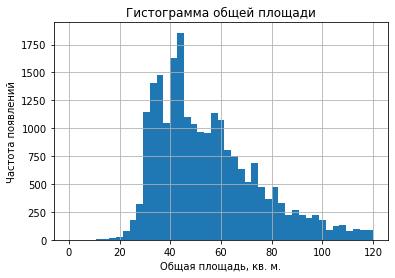

In [33]:
# построение гистограммы на отрезке 0 - 120 кв. м.
data['total_area'].hist(bins=45, range=(0, 120))
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв. м.')
plt.ylabel('Частота появлений')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

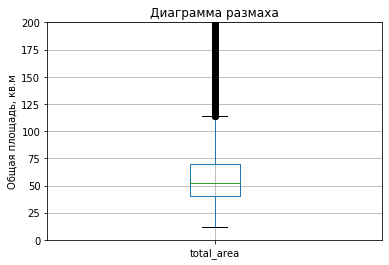

In [34]:
# посмтроение диаграммы размаха с ограничением площади 200
data.boxplot('total_area')
plt.ylim(0, 200)
plt.title('Диаграмма размаха')
plt.ylabel('Общая площадь, кв.м')
plt.show

In [35]:
anomaly_ratio('total_area')

'Доля аномальных знначений 5.26% от общего списка значений'

Добавляем столбец, описывающий является ли значение площади квартиы аномальным или нет.

In [36]:
data['too_large_total_area'] = data['total_area'] > whiskers('total_area')[1]

---
<a name="4.2">[4.2]</a> Анализ цен на квартиры.

In [37]:
whiskers('last_price')

(12190.0, 11875000.0)

In [38]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

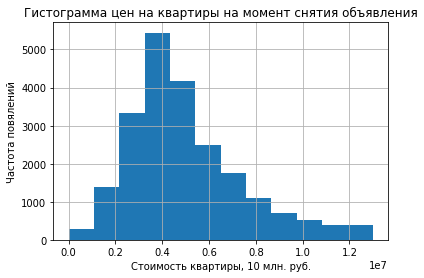

In [39]:
# посмтоим гисторамму на отрезке цен от 0 до 13 млн. руб.
data['last_price'].hist(bins=12, range=(0, 13000000))
plt.title('Гистограмма цен на квартиры на момент снятия объявления')
plt.xlabel('Стоимость квартиры, 10 млн. руб.')
plt.ylabel('Частота повялений')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

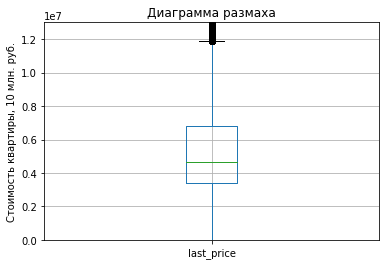

In [40]:
# построим диаграмму размаха с отрезке от 0 до 13 млн. руб.
data.boxplot('last_price')
plt.ylim(0, 13000000)
plt.title('Диаграмма размаха')
plt.ylabel('Стоимость квартиры, 10 млн. руб.')
plt.show

In [41]:
anomaly_ratio('last_price')

'Доля аномальных знначений 8.68% от общего списка значений'

Создадим столбец, описывающий является ли стоимость аномальным значением.

In [42]:
data['too_high_last_price'] = data['last_price'] > whiskers('last_price')[1]

---
<a name="4.3">[4.3]</a> Анализ числа комнат.

In [43]:
whiskers('rooms')

(0.0, 6.0)

In [44]:
data['rooms'].describe().T

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

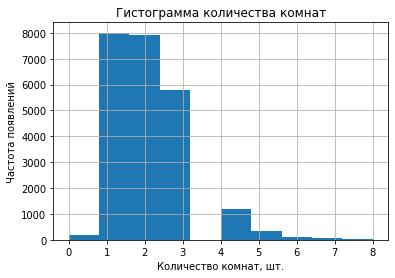

In [45]:
# посмторим гистограмму количества комнат на отрезке от 0 до 8 шт.
data['rooms'].hist(bins=10, range=(0, 8))
plt.title('Гистограмма количества комнат')
plt.ylabel('Частота появлений')
plt.xlabel('Количество комнат, шт.')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

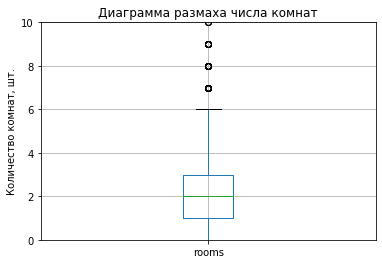

In [46]:
# посмторим диаграмму размаха числа комнат на отрезке от 0 до 10 шт.
data.boxplot('rooms')
plt.ylim(0, 10)
plt.title('Диаграмма размаха числа комнат')
plt.ylabel('Количество комнат, шт.')
plt.show

In [47]:
anomaly_ratio('rooms')

'Доля аномальных знначений 0.38% от общего списка значений'

Создадим столбец, определяющиий является ли значение количества комнат аномальным.

In [48]:
data['too_many_rooms'] = data['rooms'] > whiskers('rooms')[1]

---
<a name="4.4">[4.4]</a> Анализ высоты потолков квартир.

In [49]:
whiskers('ceiling_height')

(2.25, 3.05)

In [50]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.735737
std          0.996999
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

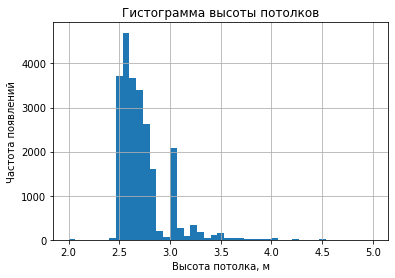

In [51]:
# посмтроим гистограмму высоты потолков в отрезке от 2 до 5 м
data['ceiling_height'].hist(bins=45, range=(2,5))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолка, м')
plt.ylabel('Частота появлений')
plt.show

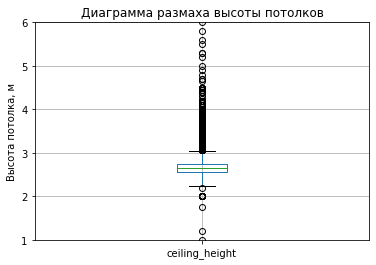

In [52]:
# построим диаграмму размаха высоты потолков
data.boxplot('ceiling_height')
plt.ylim(1,6)
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('Высота потолка, м')
plt.show()

In [53]:
anomaly_ratio('ceiling_height')

'Доля аномальных знначений 6.18% от общего списка значений'

Cоздадим столбец, описывающий является ли высота потолка аномальным значением для конкретной квартиры. Аномальные значениия находятся также ниже левого уса, поэтому в условии это необходимо прописать.

In [54]:
data['too_high_ceiling'] = ((data['ceiling_height'] > whiskers('ceiling_height')[1]) |
                            (data['ceiling_height'] < whiskers('ceiling_height')[0]))

---
<a name="4.5">[4.5]</a> Изучение время продажи квартиры.

In [55]:
whiskers('days_exposition')

(1.0, 427.5)

In [56]:
data['days_exposition'].describe()

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

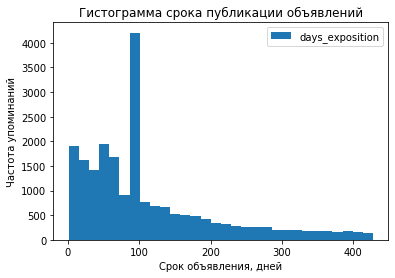

In [57]:
# построим гистограмму времени продажи квартиры 
data.plot(
    y='days_exposition',
    kind='hist',
    range=(whiskers('days_exposition')[0], whiskers('days_exposition')[1]),
    bins=30
)
plt.title('Гистограмма срока публикации объявлений')
plt.ylabel('Частота упоминаний')
plt.xlabel('Срок объявления, дней')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

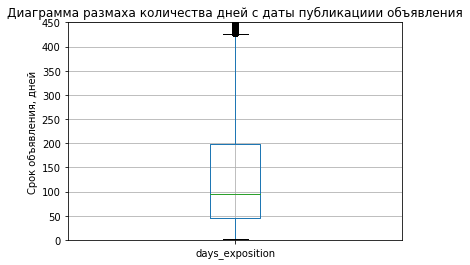

In [58]:
# построим диаграмму размаха времени продажи квартиры в отрезке от 0 до 450 дней
data.boxplot('days_exposition')
plt.title('Диаграмма размаха количества дней с даты публикациии объявления')
plt.ylim(0, 450)
plt.ylabel('Срок объявления, дней')
plt.show

Выделим в отдельные булевские столбцы является ли продажа квартиры очень быстрой или же слишком медленной.

In [59]:
data['too_fast_sell'] = data['days_exposition'] > whiskers('days_exposition')[1]
data['too_slow_sell'] = data['days_exposition'] < 30

---
<a name="4.6">[4.6]</a> Уберем редкие и выбивающиеся значения.

In [60]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_square_meter', 'weekday',
       'month', 'year', 'category_floor', 'living_area_ratio',
       'kitchen_area_ratio', 'too_large_total_area', 'too_high_last_price',
       'too_many_rooms', 'too_high_ceiling', 'too_fast_sell', 'too_slow_sell'],
      dtype='object')

In [61]:
# создадим датафрейм с "правильными" значениями
good_data = data.loc[(data['too_large_total_area'] == False) &
                    (data['too_high_last_price'] == False) &
                    (data['too_many_rooms'] == False) &
                    (data['too_high_ceiling'] == False) &
                    (data['too_fast_sell'] == False) &
                    (data['too_slow_sell'] == False)
                    .reset_index(drop=True)
                    ]
# посчитаем долю "правильных" значений
print('Доля правильных значений составила: {:.2%}'.format(len(good_data) / len(data)))

Доля правильных значений составила: 66.82%


<function matplotlib.pyplot.show(*args, **kw)>

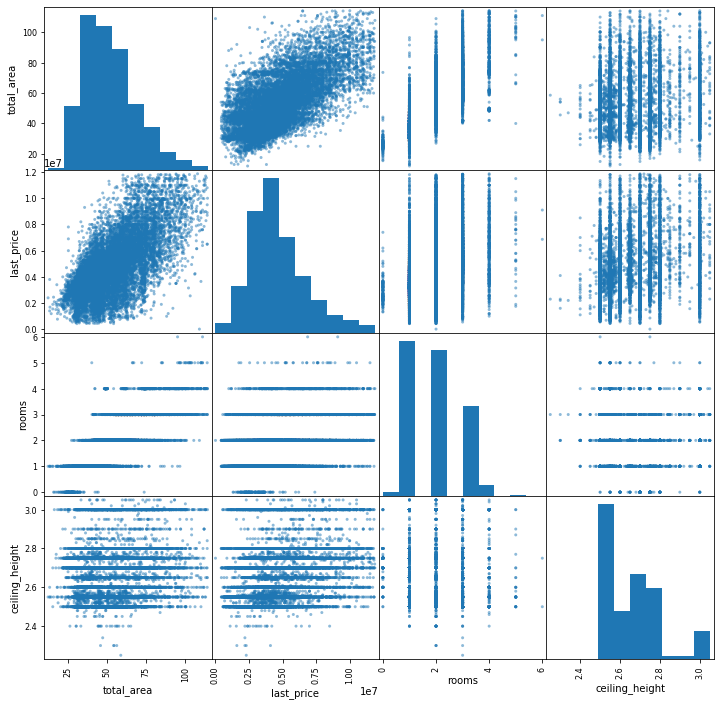

In [62]:
good_data_matrix = good_data[['total_area', 'last_price', 'rooms', 'ceiling_height']]
pd.plotting.scatter_matrix(good_data_matrix, figsize=(12, 12))
plt.show

---
<a name="4.7">[4.7]</a> Рассмотрим зависимость цены от площади и расстояния до центра города.

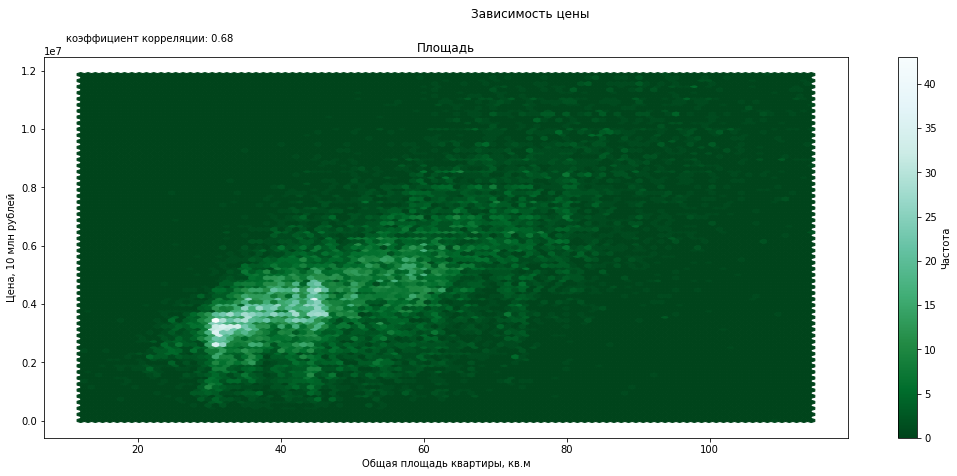

In [63]:
# Воспользуемся методом subplots для отображения
fig, ax1 = plt.subplots(figsize=(18, 7))
fig.suptitle('Зависимость цены')

# построение графика зависимости цены от площади
ax1.set_title('Площадь')
ax1.set_ylabel('Цена, 10 млн рублей')
ax1.set_xlabel('Общая площадь квартиры, кв.м')
ax1.text(10, 13000000, 'коэффициент корреляции: ' + str(round(good_data['last_price'].corr(good_data['total_area']), 2)))
hb1 = ax1.hexbin(good_data['total_area'], good_data['last_price'], cmap=plt.cm.BuGn_r)
cb1 = fig.colorbar(hb1)
cb1.set_label('Частота')
plt.show()

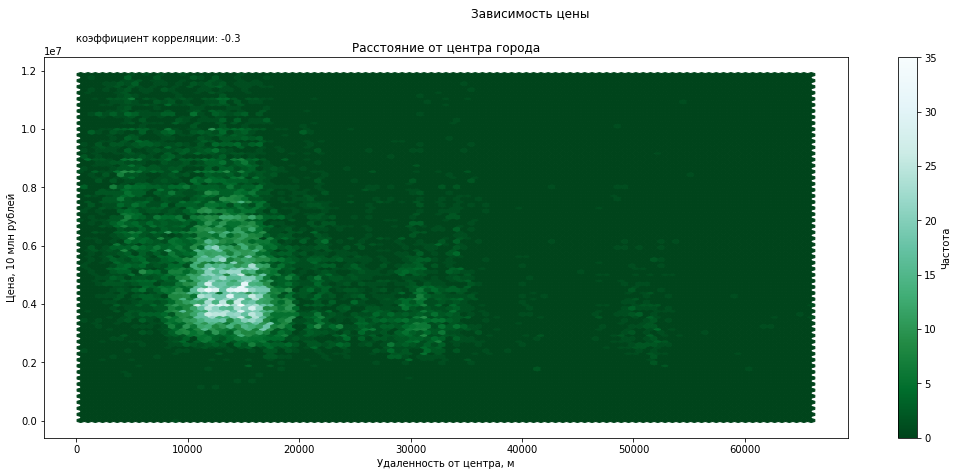

In [64]:
# Воспользуемся методом subplots для отображения
fig, ax1 = plt.subplots(figsize=(18, 7))
fig.suptitle('Зависимость цены')

# построение графика зависимости цены от расстояния до центра города
ax1.set_title('Расстояние от центра города')
ax1.set_ylabel('Цена, 10 млн рублей')
ax1.set_xlabel('Удаленность от центра, м')
ax1.text(10, 13000000, 'коэффициент корреляции: ' + str(round(good_data['last_price'].corr(good_data['cityCenters_nearest']), 2)))
hb1 = ax1.hexbin(good_data['cityCenters_nearest'], good_data['last_price'], cmap=plt.cm.BuGn_r)
cb1 = fig.colorbar(hb1)
cb1.set_label('Частота')
plt.show()

Рассмотрим зависимость цены от числа комнат, этажа, даты размещениия.

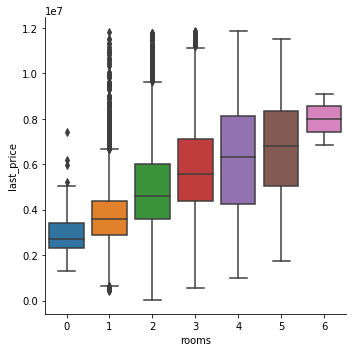

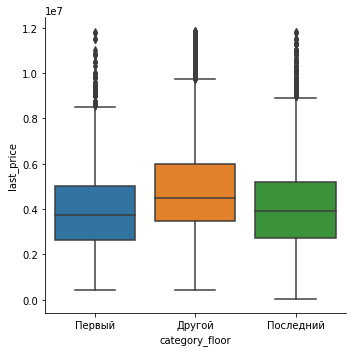

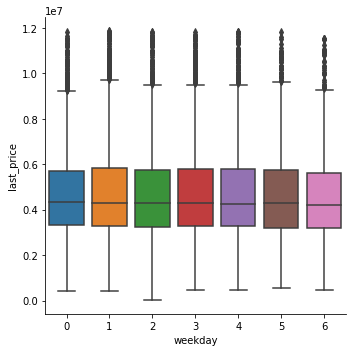

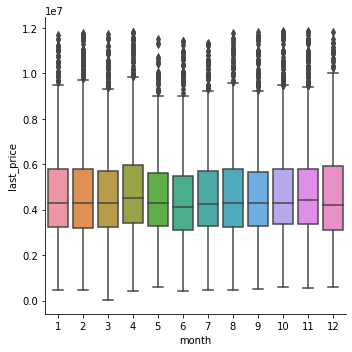

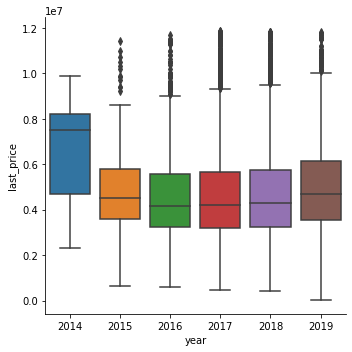

In [65]:
import seaborn as sns
for column in ['rooms', 'category_floor', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data)

---
<a name="4.8">[4.8]</a> Выделим 10 населенных пунктов с наибольшим числом объявлений и посчитаем среднею стоимость.

In [66]:
data_10_citys_expensive = good_data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=('count', 'mean'))
data_10_citys_expensive.columns = ['count', 'mean']
data_10_citys_expensive.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,9867,105603.602285
поселок Мурино,426,85759.986549
поселок Шушары,344,79152.828866
Всеволожск,301,67278.995980
Пушкин,253,99678.545850
Колпино,251,74966.259602
поселок Парголово,249,89962.828394
Гатчина,225,68735.031200
деревня Кудрово,223,92436.006771


---
<a name="4.9">[4.9]</a> Создадим столбец с окргуленным километражем до центра города. Выделим в отдельный датафрейм все данные для города Санкт-Петербург.

In [67]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000, 0)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int', errors='ignore')
good_data = data.loc[(data['too_large_total_area'] == False) &
                    (data['too_high_last_price'] == False) &
                    (data['too_many_rooms'] == False) &
                    (data['too_high_ceiling'] == False) &
                    (data['too_fast_sell'] == False) &
                    (data['too_slow_sell'] == False)
                    .reset_index(drop=True)
                    ]
spb_data = good_data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest_km'].notna())]
spb_center_nearest = spb_data.pivot_table(index='cityCenters_nearest_km', values=['price_per_square_meter', 'last_price'], aggfunc='mean')
spb_center_nearest.head()

,last_price,price_per_square_meter
cityCenters_nearest_km,,
0.0,6.466667e+06,114373.750000
1.0,7.588436e+06,125316.292564
2.0,7.592261e+06,116697.014638
3.0,7.245442e+06,109079.835487
4.0,7.146232e+06,118856.790043


/opt/conda/lib/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


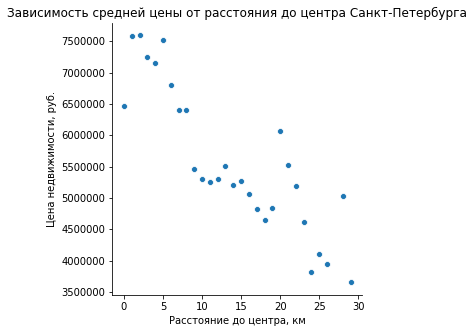

In [68]:
# посмторим график зависимости цены до центра Санкт-Петербурга
sns.relplot(x=spb_center_nearest.index, y='last_price', data=spb_center_nearest);
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show();

Видим большой разрыв в млн (5500000 - 6500000) на расстояннии до центра в 8 км, будем считать окружность радиусом **8 км центральной зоной**.

---
Проведем анализ площади, цен, числа комнат и высоты потолков, а также стоимости квартир в центре Санкт-Петербурга в зависимости от разных параметров.  
Для начала выделим квартиры из центральной зоны Санкт-Петербурга в отдельный датафрейм.

In [69]:
spb_center = good_data.query('cityCenters_nearest_km < 8 and locality_name == "Санкт-Петербург"')

Построим диаграмму размаха и вывыдем общую информацию площади, цены, количетва комнат и высоты потолков.

<a name="4.10">[4.10]</a> Площадь.

In [70]:
spb_center['total_area'].describe()

count    1199.000000
mean       61.220359
std        20.463987
min        12.000000
25%        45.000000
50%        60.000000
75%        75.050000
max       114.200000
Name: total_area, dtype: float64

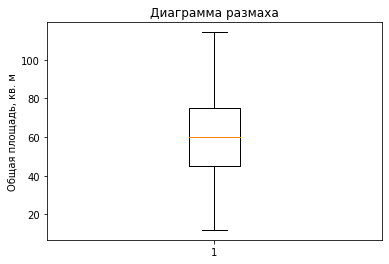

In [71]:
fig1, ax1 = plt.subplots()
ax1.boxplot(spb_center['total_area'])
plt.title('Диаграмма размаха')
plt.ylabel('Общая площадь, кв. м')
plt.show()

---
<a name="4.11">[4.11]</a> Стоимость.

In [72]:
spb_center['last_price'].describe()

count    1.199000e+03
mean     7.084009e+06
std      2.154334e+06
min      1.600000e+06
25%      5.450000e+06
50%      6.900000e+06
75%      8.550000e+06
max      1.186686e+07
Name: last_price, dtype: float64

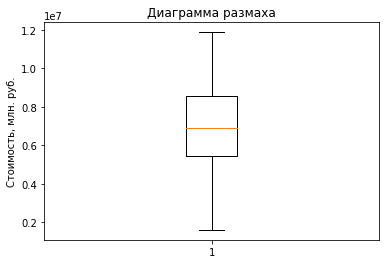

In [73]:
fig1, ax1 = plt.subplots()
ax1.boxplot(spb_center['last_price'])
plt.title('Диаграмма размаха')
plt.ylabel('Стоимость, млн. руб.')
plt.show()

---
<a name="4.12">[4.12]</a> Число комнат.

In [74]:
spb_center['rooms'].describe()

count    1199.000000
mean        2.160133
std         0.942085
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64

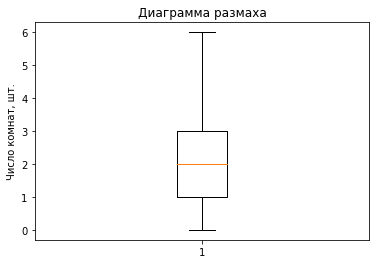

In [75]:
fig1, ax1 = plt.subplots()
ax1.boxplot(spb_center['rooms'])
plt.title('Диаграмма размаха')
plt.ylabel('Число комнат, шт.')
plt.show()

---
<a name="4.13">[4.13] </a>Высота потолков.

In [76]:
spb_center['ceiling_height'].describe()

count    1199.000000
mean        2.769083
std         0.184546
min         2.400000
25%         2.555000
50%         2.750000
75%         3.000000
max         3.050000
Name: ceiling_height, dtype: float64

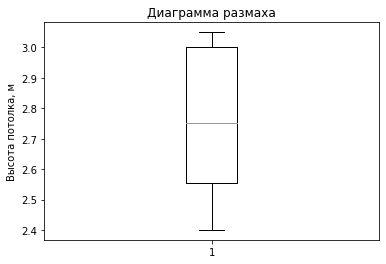

In [77]:
fig1, ax1 = plt.subplots()
ax1.boxplot(spb_center['ceiling_height'])
plt.title('Диаграмма размаха')
plt.ylabel('Высота потолка, м')
plt.show()

---
<a name="4.14">[4.14]</a> Факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга.

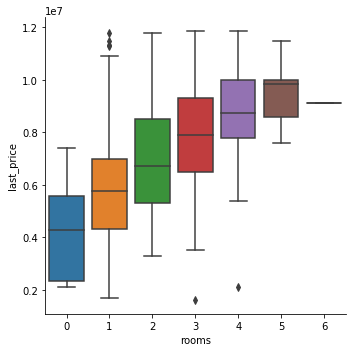

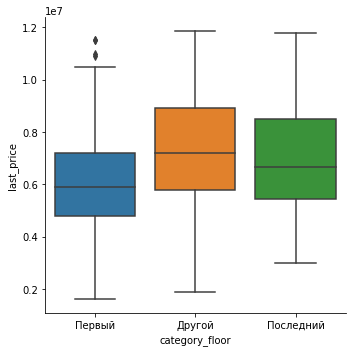

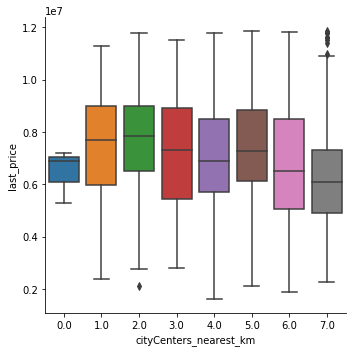

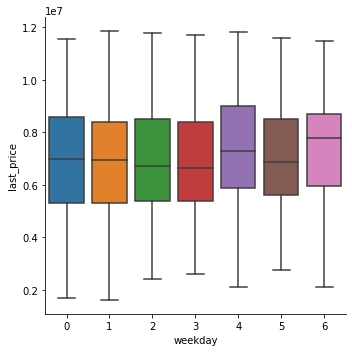

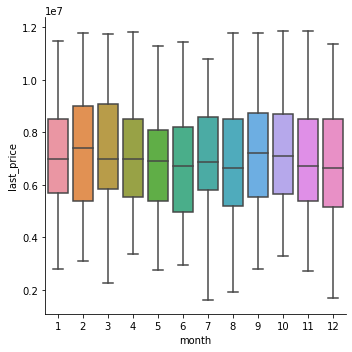

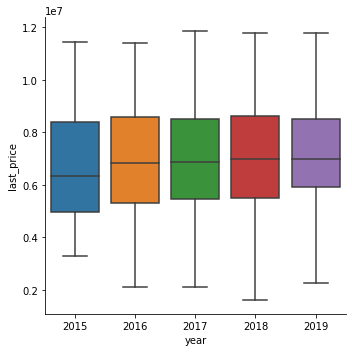

In [78]:
for column in ['rooms', 'category_floor', 'cityCenters_nearest_km', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y='last_price', data=spb_center, kind='box')

### Шаг 5. Общий вывод

Первым этапом была проведена **обработка данных**. С пункта [[1.1]](#1.1) по [[1.8]](#1.8) были заполнены пропуски. С [[1.9]](#1.9) по [[1.13]](#1.13) найдены пропуски, но оставлены без изменений, т.к. они не сыграли роли в изучении поставленных вопросах. Возможно, данные об аэропортах, водоемах и парках заносятся с карт автомотически, а при их отсутствии мы получаем пропуски. Необходимо уточнение у команды разработчиков. Также необходимо ввести ограничение на ввод двухзначных чисел для высоты потолков в случае жилой недвижимости, поскольку сейчас там много ошибок, допущенных из-за человеческого фактора. При отсутсвии значений в столбце аппартаменты подразумевается, что квартира не является аппартаментами.  
Далее, пунктом [[2.1]](#2.1) был **изменен тип данных** со строчного на временной

После этого проведен анализ характеристик всего списка квартир с пункта [[4.1]](#4.1) по [[4.6]](#4.6). Получилось, что **средняя квартира для всего города** представляет следующее:   
- Составляет 52 кв. м. (аномальные значения начинаются после 114.25 кв. м.), имеет 2 комнаты с высотой потолков 2.65 м., со стоимостью 4.6 млн. руб. Продаются в среднем за 3 месяца (95 дней). Слишком быстрая продажа - это менее 1 месяца, особенно менее 2-х недель. Слишком долгая - более 14 месяцев (428 дней).


Пунктом [[4.7]](#4.7) проведен **анализ факторов, влияющих на стоимость**. Получилось, что главным фактором является площадь квартиры, в зависимости от удаленности от центра стоимость квартир немного падает. Количество комнат влияет на стоимость до тех пор, пока их количество не достигает 4-х, далее цена перестает сильно расти. Квартиры на первых и последних этажах обладают меньшей рыночной стоимостью. Дата публикации не влияет на стоимость в общем случае, однако в 2014 году квартиры стоили дороже.\

В пункте [[4.8]](#4.8) был получен **список населенных пунктов с наибольшим количеством объявлений**. Лидерами по количетсву продаваемых квартир стали Санкт-Петербург, поселки Мурино и Шуршары. Предположительно из-за того, что большая часть перемещается из поселков и деревень в большие города.

Шагом [[4.9]](#4.9) была сводная таблица с квартирами из Санкт-Петербруга и сортированная по удаленнности от центра. Построен график на основе этой таблицы и определена граница **центральной зоны**, она составила **8 км**.   
Далее с пункта [[4.10]](#4.10) по пункт [[4.13]](#4.13) была определена **средняя квартира в центре Санкт-Петербугра**:   

- Состовляет 58 кв. м., имеет 2-е комнаты с высотом потолков 2.7 м, со стоимостью в 6.7 млн. руб.

И наконец пунктом [[4.14]](#4.14) исследованы **факторы, влияющие на стоимость квартир в центральной зоне Санкт-Петербурга**. Получилось, что в центре стоимость прямопропорциональна числу комнат. Чем их больше, тем выше стоимость, нежели в окрестнотях города. Предпологается, что это связано с большим спросом. В отличии от анализа всего массиива данных, стало заметно, что цены в центре на последних этажах выше. Стоимость положительно коррелирует в зависимости от расстояния до центра города. И, в отличии от всего списка квартир, стоимость жилой недвижимости в центре Санкт-Петербурга неуклонно растет с 2015 года. Объявления, выложенные по понедельникам и воскресеньями имеют высшую среднюю стоимость, то же самое актуально и для месяцев сентябрь - август.

Ситуация с продажей квартир в центре Санкт-Петербугра и картиной всего города отличаются.